In [4]:
#import pandas as pd

In [1]:
### parameters
import pandas as pd
import textwrap

import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

mySpecie='Homo_sapiens'
#change base dir to your data location
baseDir='/cellar/users/btsui/Data/SRA/snp/'
skymap_snp_dir=baseDir+'{specie}_snp_pos/'.format(specie=mySpecie)

#7:140753336


### read dbSNP annotation

VCF bitfield (VP) is detailed in :  
https://ftp.ncbi.nlm.nih.gov/snp/specs/dbSNP_BitField_latest.pdf

In [2]:
inVcfDir='/data/cellardata/users/btsui/dbsnp/Homo_sapiens/All_20170710.f1_byte2_not_00.vcf.gz' 
vcfDf=pd.read_csv(inVcfDir,sep='\t',header=None)
vcfDf.columns=['Chr','Pos','RsId','RefBase','AltBase','','','Annot']
vcfDf['Chr']=vcfDf['Chr'].astype(np.str)


/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
vcfDf['VP']=vcfDf['Annot'].str.extract('VP=0x(\w+);')

In [34]:
vcfDf.head()

,Chr,Pos,RsId,RefBase,AltBase,,,Annot,VP,GENEINFO,VP_binary
0,1,14727,rs1045587,G,A,.,.,RS=1045587;RSPOS=14727;RV;dbSNPBuildID=117;SSR...,050028040005000002000100,DDX11L1,0000010100000000001010000000010000000000000001...
1,1,630825,rs9783068,T,C,.,.,RS=9783068;RSPOS=630825;dbSNPBuildID=119;SSR=1...,050028020005000002000140,LOC101928626,0000010100000000001010000000001000000000000001...
2,1,630833,rs9701099,C,T,.,.,RS=9701099;RSPOS=630833;dbSNPBuildID=119;SSR=1...,050028020005000002000140,LOC101928626,0000010100000000001010000000001000000000000001...
3,1,817186,rs3094315,G,A,.,.,RS=3094315;RSPOS=817186;RV;dbSNPBuildID=103;SS...,05012802000515053f000101,FAM87B,0000010100000001001010000000001000000000000001...
4,1,833068,rs12562034,G,A,.,.,RS=12562034;RSPOS=833068;dbSNPBuildID=120;SSR=...,050128080005170537000100,LINC01128,0000010100000001001010000000100000000000000001...


In [4]:
vcfDf['Annot'].values

array(['RS=1045587;RSPOS=14727;RV;dbSNPBuildID=117;SSR=0;SAO=0;VP=0x050028040005000002000100;GENEINFO=DDX11L1:100287102|WASH7P:653635;WGT=1;VC=SNV;PM;PMC;R3;ASP',
       'RS=9783068;RSPOS=630825;dbSNPBuildID=119;SSR=1;SAO=0;VP=0x050028020005000002000140;GENEINFO=LOC101928626:101928626;WGT=1;VC=SNV;PM;PMC;R5;ASP',
       'RS=9701099;RSPOS=630833;dbSNPBuildID=119;SSR=1;SAO=0;VP=0x050028020005000002000140;GENEINFO=LOC101928626:101928626;WGT=1;VC=SNV;PM;PMC;R5;ASP',
       ...,
       'RS=41458645;RSPOS=16278;dbSNPBuildID=127;SSR=0;SAO=0;VP=0x050028000005000402000100;WGT=1;VC=SNV;PM;PMC;ASP;HD',
       'RS=41378955;RSPOS=16390;dbSNPBuildID=127;SSR=0;SAO=0;VP=0x050028000005000402000100;WGT=1;VC=SNV;PM;PMC;ASP;HD',
       'RS=3937033;RSPOS=16519;dbSNPBuildID=108;SSR=0;SAO=0;VP=0x050128020005000502000100;GENEINFO=ND6:4541;WGT=1;VC=SNV;PM;PMC;SLO;R5;ASP;HD;GNO'],
      dtype=object)

In [5]:
vcfDf['GENEINFO']=vcfDf['Annot'].str.extract('GENEINFO=(\w+)',expand=False).values


In [6]:
#vcfDf.groupby(['GENEINFO']).size().median()
#somatic mutations vs germlime

In [7]:
num_of_byte=12
num_of_bits=num_of_byte*(8)
def toBin(my_hexdata):
    Hex=int(my_hexdata,base=16)
    return bin( Hex )[2:].zfill(num_of_bits)

In [8]:
dbsnpFlagDf=pd.read_csv('Data/dbsnpFlag.tsv',sep='\t')

#dbsnpFlagDf['Flag']=dbsnpFlagDf['Flag'].str.replace('[A-Z]','')

#dbsnpFlagDf['Flag']=dbsnpFlagDf['Flag'].astype(int)

In [9]:
dbsnpFlagDf_MultI=dbsnpFlagDf.set_index(['byte_left_to_right','bit'])['Link'].sort_index()

In [10]:
vcfDf['VP_binary']=vcfDf['VP'].apply(toBin).values

In [11]:
vcfDf.shape, 18846

((393242, 11), 18846)

In [12]:
vcfDf=vcfDf#[(vcfDf['Chr']=='7')&(vcfDf['Pos']==140753336)]

In [13]:
#12 byte, 24 hex digits
VP_binary_l=vcfDf.VP_binary.apply(lambda S:pd.Series(textwrap.wrap(S,8)))

In [14]:
byteFieldDf=VP_binary_l#.T.unstack().unstack()#.apply(len)

In [15]:
#VP_binary_l

### extract distribution of data

In [16]:
#byte=11
myL=[]
myByteToNameS=pd.Series({1:'resource link properties',
              2:'resource link properties',
              3:'gene function properties',
              4:'gene function properties',
              5:'mapping properties',
              6:'allele frequency properties',
              7:'genotype properties',
              8:'Validation by HapMap/TGP properties',
              9:'phenotype properties',
              10:'variation class',
              11:'quality check',
              12:'Version encoding',
             })


for byte in np.arange(1,12):
    tmpVC=byteFieldDf[byte].value_counts()#.head(n=10)
    bitVectors=tmpVC.index.values

    #dbsnpFlagDf_MultI.loc[byte]

    myDict=defaultdict(str)
    dbsnpFlagDf_MultI_sub=dbsnpFlagDf_MultI.loc[byte]
    for bitVector in bitVectors:
        #right to left, the bit vector from NCBI count from right to left, revert the order first 
        endianCorrectedVect=bitVector[::-1]
        for i in range(len(endianCorrectedVect)):
            if endianCorrectedVect[i]=='1':
                dbSNP_field=dbsnpFlagDf_MultI_sub.loc[i+1]
                myDict[bitVector]+=(dbSNP_field+'\n')

    #dbsnpFlagDf_MultI.loc[byte].values

    bitVectorToFnameS=pd.Series(myDict)

    tmpVC2=tmpVC.head(n=10)
    tmpS=pd.Series(index=bitVectorToFnameS.loc[tmpVC2.index].values, data=tmpVC2.values)
    bitVectorS=pd.Series(index=bitVectorToFnameS.loc[bitVectors],data=bitVectors)
    tmpDf=tmpS.to_frame('count')
    tmpDf['bitVector']=bitVectorS[:]
    myL.append(tmpDf)

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [17]:
#tmpDf.shape

In [18]:
#tmpDf

In [19]:
#byteFieldDf[byte]

In [20]:
keys=np.arange(1,12)#myByteToNameS.loc[np.arange(1,12)].values.tolist()

In [21]:
#len(myL),len(keys)

In [22]:
#keys

In [23]:
mergedCountDf=pd.concat(myL,keys=keys,axis=0)#.dropna()

In [24]:
mergedStatDf=mergedCountDf.reset_index()

In [25]:
#mergedStatDf

In [26]:
mergedStatDf.columns=['Byte_left_to_right','Varation properties','Count','bitVector']

In [27]:
mergedStatDf['Variation_area']=myByteToNameS[mergedStatDf['Byte_left_to_right']].values

In [28]:
mergedStatDf['Varation properties']=mergedStatDf['Varation properties'].fillna('N/A')

In [29]:
#mergedStatDf

In [30]:
countDf=mergedStatDf.set_index(['Variation_area','bitVector','Byte_left_to_right','Varation properties'])[['Count']]

In [31]:
excel=pd.ExcelWriter('./Data/snp.count.xlsx')
countDf.to_excel(excel)
excel.close()

In [36]:
#6, 3
#'100100'

In [33]:
!echo $PWD/./Data/snp.count.xlsx

/cellar/users/btsui/Project/METAMAP/notebook/RapMapTest/XGS_WGS/./Data/snp.count.xlsx


### extract from byte

input: bitVectors
ouutoutput: 

In [532]:
byte=5


In [533]:

tmpVC=byteFieldDf[byte].value_counts()#.head(n=10)
bitVectors=tmpVC.index.values

#dbsnpFlagDf_MultI.loc[byte]

myDict=defaultdict(str)
dbsnpFlagDf_MultI_sub=dbsnpFlagDf_MultI.loc[byte]
for bitVector in bitVectors:
    #right to left, the bit vector from NCBI count from right to left, revert the order first 
    endianCorrectedVect=bitVector[::-1]
    for i in range(len(endianCorrectedVect)):
        if endianCorrectedVect[i]=='1':
            ###bit need to have a plus one
            dbSNP_field=dbsnpFlagDf_MultI_sub.loc[i+1]
            myDict[bitVector]+=(dbSNP_field+'\n')

#dbsnpFlagDf_MultI.loc[byte].values

bitVectorToFnameS=pd.Series(myDict)



#pd.Series(index=bitVectorToFnameS.loc[tmpVC2.index].values, data=tmpVC2.values)
bitVectorToFnameS

00000101    Weight (2 bits). Weight on NCBI reference asse...
00010101    Weight (2 bits). Weight on NCBI reference asse...
00001101    Weight (2 bits). Weight on NCBI reference asse...
dtype: object

In [534]:
dbsnpFlagDf_MultI_sub

bit
1    Weight (2 bits). Weight on NCBI reference asse...
2    Weight (2 bits). Weight on NCBI reference asse...
3    Is Assembly specific. This bit is 1 if the snp...
4    Has Assembly conflict. This is for weight 1 an...
5    Has other snp. with exatly the same set of map...
Name: Link, dtype: object

/cellar/users/btsui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


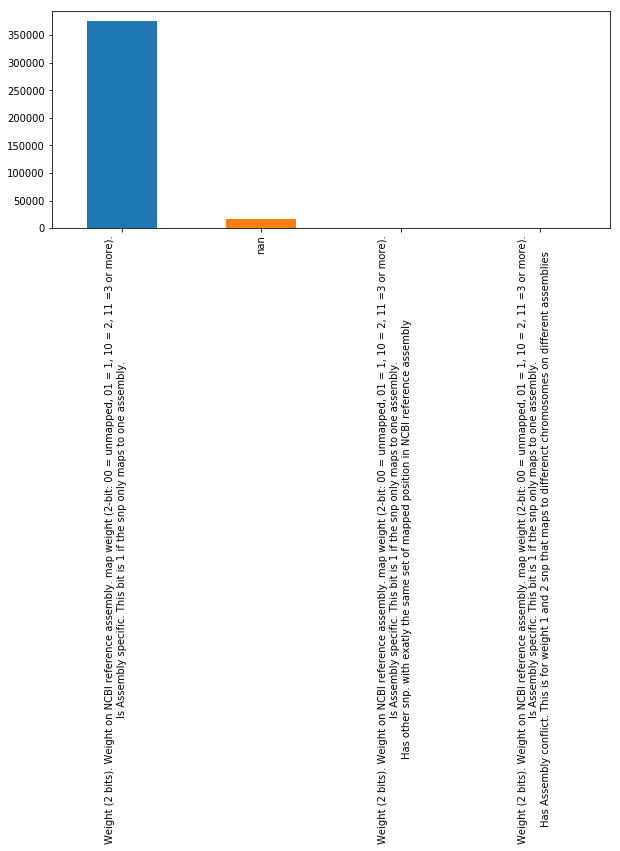

In [535]:
fig,ax=plt.subplots(figsize=(10,4))

tmpVC2=tmpVC.head(n=10)
ax=pd.Series(index=bitVectorToFnameS.loc[tmpVC2.index].values,data=tmpVC2.values).plot.bar()


In [536]:
#100100
#why is this both missense and STOP-GAIN?

tmpVC2

00000101    376159
00000000     16748
00010101       170
00001101       165
Name: 5, dtype: int64

###

In [520]:
#00000101
#allele frequency properties

In [550]:
vcfDf['GENEINFO'].nunique()

0

In [551]:
vcfDf['GENEINFO']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
393212    NaN
393213    NaN
393214    NaN
393215    NaN
393216    NaN
393217    NaN
393218    NaN
393219    NaN
393220    NaN
393221    NaN
393222    NaN
393223    NaN
393224    NaN
393225    NaN
393226    NaN
393227    NaN
393228    NaN
393229    NaN
393230    NaN
393231    NaN
393232    NaN
393233    NaN
393234    NaN
393235    NaN
393236    NaN
393237    NaN
393238    NaN
393239    NaN
393240    NaN
393241    NaN
Name: GENEINFO, Length: 393242, dtype: object

In [521]:
bitVector='00001111'
endianCorrectedVect=bitVector[::-1]

In [522]:
m_binary=(byteFieldDf[byte]==bitVector).values

In [548]:
#vcfDf['GENEINFO'].value_counts()

In [524]:
#bitVectorToFnameS.values

In [525]:
#bitVectorToFnameS.loc[bitVector]

In [526]:
#m=vcfDf['VP_binary'].str.contains('\w+{}00001010'.format(8*3))

In [527]:
#missense,nc transcript variant for the first couple, missense,nc transcript variant
"""
00001010, seem to be all: missense,nc transcript variant
00000011: rs267598747:synonymous codon, synon codon

r vcfDf and 

Hypothesis on bug: the mapping is mostlikely off 
"""
#

'\n00001010, seem to be all: missense,nc transcript variant\n00000011: rs267598747:synonymous codon, synon codon\n\nr vcfDf and \n\nHypothesis on bug: the mapping is mostlikely off \n'

In [528]:
bitVectorToFnameS.index[0]

'00001010'

In [529]:
bitVectorToFnameS.iloc[0]

'Has reference. A coding region variation where one allele in the set is identical to the reference sequence. FxnCode = 8\nHas non-synonymous missense. A coding region variation where one allele in the set changes protein peptide. FxnClass = 42\n'

In [530]:
"""
byte 4: 00001010
2,4

has one allele: 

"""

'\nbyte 4: 00001010\n2,4\n\nhas one allele: \n\n'

In [531]:
vcfDf[m_binary]

,Chr,Pos,RsId,RefBase,AltBase,,,Annot,VP,VP_binary
28183,1,235766122,rs80338660,G,"A,C,T",.,.,RS=80338660;RSPOS=235766122;RV;dbSNPBuildID=13...,050168000f05040026110104,0000010100000001011010000000000000001111000001...
30958,2,1487841,rs121908082,C,"A,G,T",.,.,RS=121908082;RSPOS=1487841;dbSNPBuildID=132;SS...,050268080f05040002110100,0000010100000010011010000000100000001111000001...
34025,2,31386525,rs119460972,G,"A,C,T",.,.,RS=119460972;RSPOS=31386525;RV;dbSNPBuildID=13...,050268000f05040002110104,0000010100000010011010000000000000001111000001...
37812,2,47798725,rs63749980,C,"A,G,T",.,.,RS=63749980;RSPOS=47798725;dbSNPBuildID=137;SS...,050060400f05040002100104,0000010100000000011000000100000000001111000001...
38040,2,47799427,rs63750909,C,"A,G,T",.,.,RS=63750909;RSPOS=47799427;dbSNPBuildID=137;SS...,050268000f05000002100104,0000010100000010011010000000000000001111000001...
40404,2,61839437,rs202193201,G,"A,C,T",.,.,RS=202193201;RSPOS=61839437;dbSNPBuildID=137;S...,050068000f05040036110100,0000010100000000011010000000000000001111000001...
64305,2,233682328,rs17863778,C,"A,G,T",.,.,RS=17863778;RSPOS=233682328;dbSNPBuildID=126;S...,050138080f05150036000104,0000010100000001001110000000100000001111000001...
76916,3,70976982,rs775136381,G,"A,C,T",.,.,RS=775136381;RSPOS=70976982;dbSNPBuildID=144;S...,050060000f05040002100104,0000010100000000011000000000000000001111000001...
87284,4,1004286,rs121965031,C,"A,G,T",.,.,RS=121965031;RSPOS=1004286;dbSNPBuildID=133;SS...,050068000f05040002110104,0000010100000000011010000000000000001111000001...
99485,4,154796798,rs144494582,C,"A,G,T",.,.,RS=144494582;RSPOS=154796798;dbSNPBuildID=134;...,050060000f05040002100124,0000010100000000011000000000000000001111000001...
